In [ ]:
# Electricity Bill Data Analysis and Forecasting

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor #we will use random forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Setting plot style to visualize
sns.set(style="whitegrid")


In [42]:
# 1. Data loading
df = pd.read_csv('Bill Data.csv', header=3) 

df.head()


,Reference No,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,April.1
0,09 13173 0454800 R,2307,3878,7288,7528,8888,9323,3615,1623,1501,1170,1276,1403,2629
1,09 13173 0454700 R,3031,2663,8757,7466,10128,10951,3929,1376,1224,925,1083,1156,1604
2,09 13173 0454600 R,2273,2959,4614,8159,10775,14662,3836,1612,1579,1284,1415,1563,3494
3,09 13173 0454500 R,294,379,320,1046,1160,591,587,388,539,768,836,1692,784
4,09 13173 0454401 U,483,1018,1448,767,1302,3832,955,177,464,947,2168,1216,1981


In [43]:
# 2. Data exploration
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

# Checking for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

print("First few rows of the dataset:")
print(bill_df.head())

print("\nData columns:")
print(bill_df.columns)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Reference No  40 non-null     object
 1   April         40 non-null     int64 
 2   May           40 non-null     int64 
 3   June          40 non-null     int64 
 4   July          40 non-null     int64 
 5   Aug           40 non-null     int64 
 6   Sep           40 non-null     int64 
 7   Oct           40 non-null     int64 
 8   Nov           40 non-null     int64 
 9   Dec           40 non-null     int64 
 10  Jan           40 non-null     int64 
 11  Feb           40 non-null     int64 
 12  Mar           40 non-null     int64 
 13  April.1       40 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 4.5+ KB

Missing Values:
Reference No    0
April           0
May             0
June            0
July            0
Aug             0
Sep             0
Oct             

In [44]:
# 3. Data Preprocessing and cleaning
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in column:\n", missing_values)

# Drop missing value
df.dropna(inplace=True)
# we erased all missing values

Missing values in column:
 Reference No    0
April           0
May             0
June            0
July            0
Aug             0
Sep             0
Oct             0
Nov             0
Dec             0
Jan             0
Feb             0
Mar             0
April.1         0
dtype: int64


In [39]:
print(df.columns)

Index(['APRIL 2018 To APRIL 2019', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')


In [47]:
# Converting 'Reference No' to string because we need it as a text only
df['Reference No'] = df['Reference No'].astype(str)

# Melting the dataframe to have a long format
df_melted = pd.melt(df, id_vars=['Reference No'], var_name='Month', value_name='Load')

# Convert 'Month' to datetime
df_melted['Month'] = pd.to_datetime(df_melted['Month'] + ' 2018', format='mixed')

# Sort the dataframe by 'Reference No' and 'Month'
df_melted.sort_values(by=['Reference No', 'Month'], inplace=True)

# Reset index
df_melted.reset_index(drop=True, inplace=True)

# Display the transformed dataframe
df_melted.head()

,Reference No,Month,Load
0,04 13173 0189000 U,2018-01-01,1397
1,04 13173 0189000 U,2018-02-01,1834
2,04 13173 0189000 U,2018-03-01,3315
3,04 13173 0189000 U,2018-04-01,3061
4,04 13173 0189000 U,2018-04-01,5743


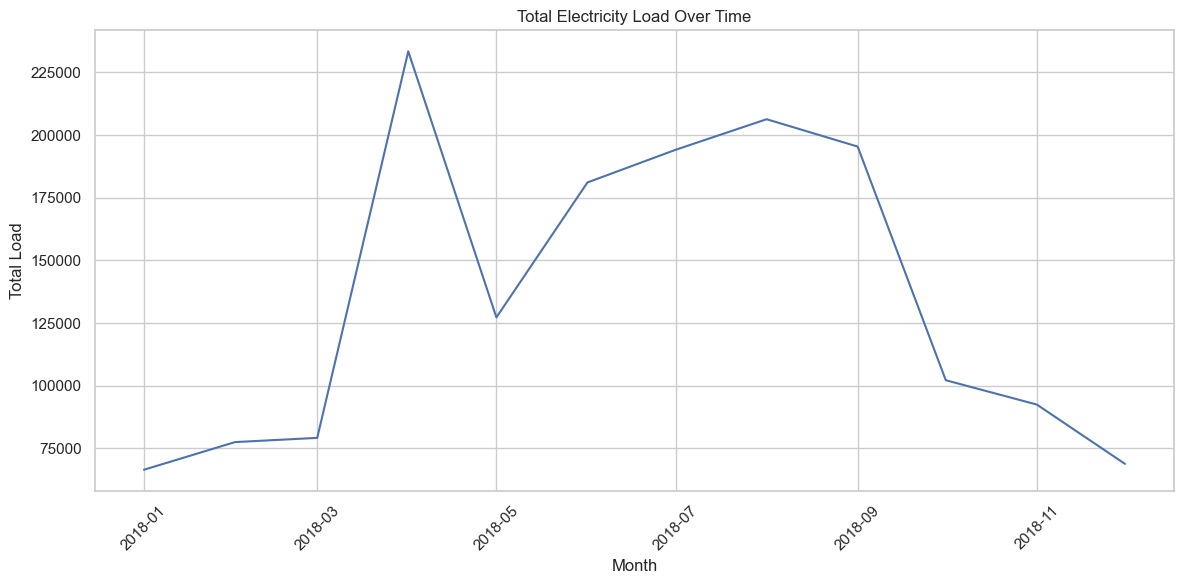

In [49]:
# EDA
# Plot total load over time
total_load = df_melted.groupby('Month')['Load'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_load, x='Month', y='Load')
plt.title('Total Electricity Load Over Time')
plt.xlabel('Month')
plt.ylabel('Total Load')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [50]:
# 5. Feature engineering

# Extracting features from 'month'
df_melted['Year'] = df_melted['Month'].dt.year
df_melted['Month_Num'] = df_melted['Month'].dt.month

# label encoding 'Reference No'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_melted['Reference_No_Encoded'] = le.fit_transform(df_melted['Reference No'])

# features and target
f = ['Year', 'Month_Num', 'Reference_No_Encoded']
trg = 'Load'

X = df_melted[f]
y = df_melted[trg]



In [51]:
# 6. Model training

# Spliting data to the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [52]:
# 7. model evaluation

# Predicting the test set
y_pred = rf_model.predict(X_test)

# Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Outputing results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")


Mean Absolute Error (MAE): 1281.27
Mean Squared Error (MSE): 4733641.16
Root Mean Squared Error (RMSE): 2175.69
R-squared (R^2): 0.56


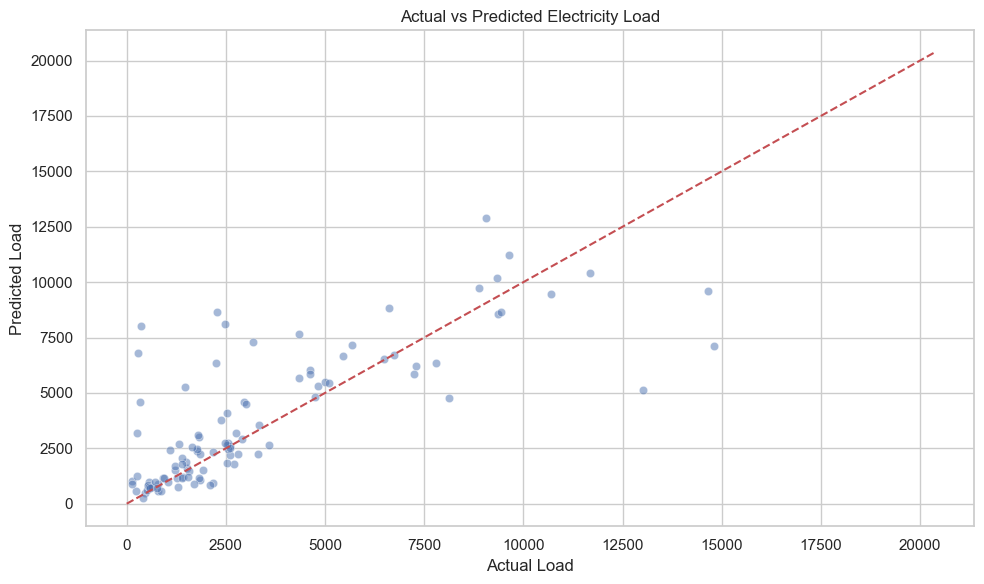

In [53]:
# 8. visualising and prediction
# dataframe for actual vs predicted
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Ploting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title('Actual vs Predicted Electricity Load')
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.tight_layout()
plt.show()
